In [1]:
import numpy as np
import matplotlib.pyplot as plt

# These are used for the animation
import time
from IPython import display

# Diatomic molecule

In [2]:
# Morse potential parameters
D         = 1.5  # kJ 
alpha     = 1.0  # nm-1  # Parameter determining the width of the well
re        = 1.5  # nm

# Define the function to calculate the Morse potential
def potential(r):
    
    # r is the distance between two atoms
    # We shift the potential $V(r)$ by $D$ in order to have the minimum $V(r_e) = - D$.

    pot =     D * ( 1 - np.exp( - alpha * ( r - re ) ) ) ** 2 - D
        
    return pot

# Define the function to calculate the derivative of the Morse potential
def der_potential(r):
    
    der = 2 * D * alpha * np.exp( - alpha * ( r - re ) ) * ( 1 - np.exp( - alpha * ( r - re ) ) ) 
    
    return der

In [3]:
## This cell is used to define the problem
## The comment on the right side of each variable denotes the physical units

# Number of atoms
N        = 2

# Mass vector (we assume each mass is 1 amu)
m        = np.ones(N)   # amu 

# Initial and arrival time
tmin     = 0    # ps    
tmax     = 5   # ps   

# Integrator timestep
dt       = 0.001   # ps

# Array with time values
t        = np.arange(tmin, tmax + dt, dt)   # ps

# Number of timestpes
Nt       = len(t)

print("The number of timesteps will be:", Nt)

The number of timesteps will be: 5001


In [4]:
# Box size
L = 2

# Initial position of the two atoms
r0 = np.array([[-1, 0], [1, 0]])

print("The initial coordinates are:")
print("r0 =")
print("[[x1, y1]")
print(" [x2, y2]]")
print("=")
print(r0)

# Initial momentum of the two atoms

p0 = np.array([[0, -1], [0, +1]])

print("The initial momenta are:")
print("p0 =")
print("[[px1, py1]")
print(" [px2, py2]]")
print("=")
print(p0)

The initial coordinates are:
r0 =
[[x1, y1]
 [x2, y2]]
=
[[-1  0]
 [ 1  0]]
The initial momenta are:
p0 =
[[px1, py1]
 [px2, py2]]
=
[[ 0 -1]
 [ 0  1]]


In [5]:
# Create two array of zeros with dimensions Nt x N x 2 for the positions and the momenta
r = np.zeros((Nt, N, 2))
p = np.zeros((Nt, N, 2)) 

# Copy the initial positions and initial momenta into the arrays
r[0,:,:] = r0
p[0,:,:] = p0

# Create and array of zeros where to store the total energy at each timestep
energy  = np.zeros(Nt)

In [6]:
# Implement the velocity - Verlet integrator

for k in range(Nt - 1):
    
    # dr is the difference vector between atom 0 and atom 1 at timestep k
    dr           = r[k,0,:] - r[k,1,:]
    
    # r is the Euclidean distance
    distance     = np.sqrt( dr[0] ** 2 + dr[1] ** 2 )
    
    # Calculate total energy at time step k
    energy[k]    = 0.5 * np.sum( p[k,0,:] ** 2 ) / m[0] + \
                   0.5 * np.sum( p[k,1,:] ** 2 ) / m[0] + \
                   potential(distance) 
    
    # Calculate force
    force12      = - der_potential( distance ) * dr / distance
    force21      = - force12
    
    #
    
    
    # Update positions
    r[k+1, 0, :] = r[k, 0, :] + p[k, 0, :] / m[0] * dt + 0.5 * force12 / m[0] * dt ** 2  
    r[k+1, 1, :] = r[k, 1, :] + p[k, 1, :] / m[1] * dt + 0.5 * force21 / m[1] * dt ** 2 
    
    
    # Recalculate force
    dr           = r[k+1, 0, :] - r[k+1, 1, :]
    distance     = np.sqrt( dr[0] ** 2 + dr[1] ** 2)
    
    force12_1    = - der_potential( distance ) * dr / distance
    force21_1    = - force12_1
        
    # Update momenta
    p[k+1, 0, :] = p[k, 0, :] + 0.5 * ( force12 + force12_1 ) * dt 
    p[k+1, 1, :] = p[k, 1, :] + 0.5 * ( force21 + force21_1 ) * dt 

## Animation

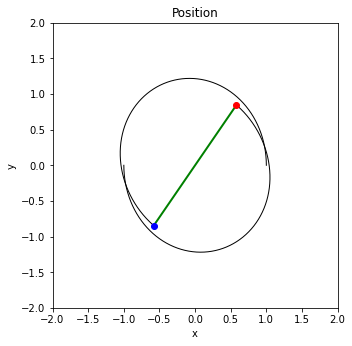

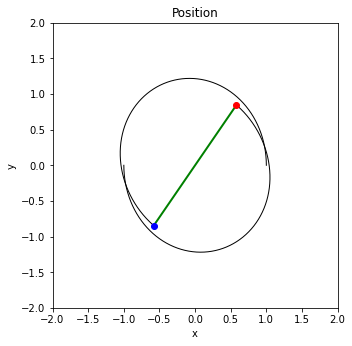

In [7]:
fig, (ax1)= plt.subplots(1, 1, figsize=(5,5)) 

for k in np.arange(0, Nt, 50):
    
    # For animation
    plt.cla()
    
    # This plots the green bar
    ax1.plot( [ r[k, 0, 0], r[k, 1, 0] ], \
              [ r[k, 0, 1], r[k, 1, 1] ], 'g-', linewidth = 2)
    
    # This plot the trajectory of atom 1
    ax1.plot( r[:, 0, 0], r[:, 0, 1], 'k-', linewidth = 1)
    
    # This plot the trajectory of atom 2
    ax1.plot( r[:, 1, 0], r[:, 1, 1], 'k-', linewidth = 1)
    
    # This plot atom 1
    ax1.plot( r[k, 0, 0], r[k, 0, 1], 'ro', linewidth = 2)
    
    # This plot atom 2
    ax1.plot( r[k, 1, 0], r[k, 1, 1], 'bo', linewidth = 2)
    
    # Figure details
    ax1.set_title('Position')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.axis('square')
    ax1.set_xlim((-2, 2))
    ax1.set_ylim((-2, 2))
    
    # For animation
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.0005)
    
    fig.tight_layout();

### Total energy

Text(0.5, 0, 'time')

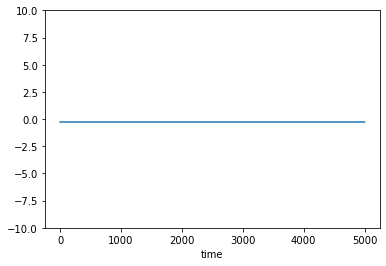

In [11]:
plt.plot(energy[0:-1])
plt.ylim((-10, 10))
plt.xlabel("time")